In [1]:
# Import python's built-in regular expression library
import re
import ollama
from ollama import chat, ChatResponse, Options


In [2]:
# prompt = "The below is an output from a model intepreting a sentence using ASL. .\n" + \
#         "The inputs may contain phrases and individual alphabets, but the detection might tend toward specific alphabets or numbers, causing redundant inputs and duplicates.\n" + \
#         # "Also, the signs of some alphabets and numbers are extremely similar. \n" + \
#         # "Do not consider the output as a number or alphabet until you have 10 consecutive predictions.\n" + \
#         # "Do not take any alphabet to be an intepretation of something else. \n" + \
#         "I want you to decipher in the particular context if the output should be a number or alphabet before you output an approximate and logical phrase that the person is trying to say.\n" +  \
#         "Assistant: sure, here's the required information:if the output should be a numb"
grammar = 'root::= optional-greeting WS? (question | statement) \n' + \
            'optional-greeting ::= greeting-word |  \n' + \
            'greeting-word ::= "Hello" \n' + \
            'question ::= interrogative-pronoun WS verb WS possessive-pronoun WS noun "?" \n' + \
            'statement ::= possessive-pronoun WS noun WS verb WS proper-noun (WS proper-noun)* \n' + \
            'interrogative-pronoun ::= "What" \n' + \
            'possessive-pronoun ::= "My" | "Your" \n' + \
            'verb ::= "is" \n' + \
            'noun ::= "name" \n' + \
            'proper-noun ::= capital-word+ \n' + \
            'capital-word ::= capital-letter+ \n' + \
            'capital-letter ::= [A-Z] \n' + \
            'lowercase-letter ::= [a-z] \n' + \
            'WS ::= " " | "\t" | "\n"'

json_format = {
    "Reasoning": "...",
    "Output": "..."
}




In [3]:
grammar = 'root         ::= question | statement | greeting-question | greeting-statement \n' + \
'question               ::= interrogative-pronoun WS verb WS possessive-pronoun WS noun "?"\n' + \
'greeting-question      ::= greeting WS question\n' + \
'statement              ::= possessive-pronoun WS noun WS verb WS proper-noun (WS proper-noun)*\n' + \
'greeting-statement     ::= greeting WS statement\n' + \
'greeting               ::= "hello"\n' + \
'interrogative-pronoun  ::= "what"\n' + \
'possessive-pronoun     ::= "my" | "your"\n' + \
'verb                   ::= "is"\n' + \
'noun                   ::= "name"\n' + \
'proper-noun            ::= lowercase-letter+\n' + \
'lowercase-letter       ::= [a-z]\n' + \
'number		            ::= [0-9]\n' + \
'WS                     ::= " " | "\t" | "\n"'

In [4]:
def get_response(text):
    # full_text = prompt + '`' + text + '`'
    full_text = text
    response: ChatResponse = chat(model='llama3', messages=[
    # { 'role': "system", "content": "You are an intepretor trying to figure out a sentence using ASL from an ASL classification model.\n" + \
    #     "The inputs may contain phrases and alphanumeric characters, the model might misclassify them due to similar ASL gestures.\n" },
        # "You can only use the grammar for your output:\n" + grammar},
    {'role': "system", "content": "You are an interpreter trying to convert ASL signals (possibly misclassified) into full English sentences.\n"},
                                    # "Use the provided grammar strictly to guide your interpretation:\n" + grammar},
    {'role': 'user', 'content': full_text},
    # {'role': 'system', 'content': "Always respond in this exact JSON format: { 'Reasoning': '...', 'Output': '...' }"},
    # {'role': 'user', 'content': "Only respond using the JSON format with your reasoning and the interpreted sentence."},
    {'role': 'system', 'content': "Output:"},
    # {'role': 'assistant', 'content': "Reasoning: json['Reasoning']"},
    ], options=Options(grammar=grammar, json_format=json_format))
    # ])

    # print(response['message']['content'])
    return response['message']['content']

In [54]:
def get_response(text):
    full_text = text
    response: ChatResponse = chat(model='llama3', messages=[
        {
            'role': "system", 
            "content": (
                "You are an interpreter trying to convert ASL signals (possibly misclassified) into English sentences.\n"
                "You must strictly follow this grammar:\n"
                "```\n" + grammar + "\n```\n"
                "You must always respond in this JSON format:\n"
                "{ 'Reasoning': '...', 'Output': '...' }"
            )
        },
        {'role': 'user', 'content': full_text}
    ])
    print (response)
    return response['message']['content']


In [55]:
# Prompt
# PROMPT = "Hello 5 5 5 5 J J J 5 Your X J J 5 Name What 5 5 5"
# PROMPT = "Hello Hello Hello Name My J O H H N"
# PROMPT = "hello K K K K K K K hello K E E E E 0 I I I I I T T T T T T H H H H H H H H H H H"
PROMPT = "J my my H name name C H R I S"

# Print Ollama's response
json_msg = get_response(PROMPT)
json_msg



model='llama3' created_at='2025-03-27T06:16:04.303196342Z' done=True done_reason='stop' total_duration=21502323823 load_duration=5130033842 prompt_eval_count=236 prompt_eval_duration=6204727967 eval_count=90 eval_duration=10159284222 message=Message(role='assistant', content='{ \'Reasoning\': \'The input ASL signal appears to be a statement. The "my" and "my" indicate possession, while the "H" and "name" indicate the topic is about someone or something. The sign for "CHRIS" suggests that the person\'s name is Chris. Therefore, I will interpret this as a statement saying "My name is Chris."\', \'Output\': \'My name is Chris.\' }', images=None, tool_calls=None)


'{ \'Reasoning\': \'The input ASL signal appears to be a statement. The "my" and "my" indicate possession, while the "H" and "name" indicate the topic is about someone or something. The sign for "CHRIS" suggests that the person\'s name is Chris. Therefore, I will interpret this as a statement saying "My name is Chris."\', \'Output\': \'My name is Chris.\' }'

In [51]:
# match = re.search(r"'Output':\s*'(.*?)'\s*", json_msg)
match = re.search(r"'Output':\s*'((?:[^'\\]|\\.)*)'"

, json_msg)
# match[0]
if match:
    print(match.group(1))
else:

    print("No match")

Hello, my name is Chris.


In [18]:
import subprocess
import pandas as pd
import os
cpu_count = os.cpu_count()
SYSTEM = "You are an interpreter trying to convert ASL phrases and fingerspelled names into English sentences. You must strictly follow the grammar provided"
# SYSTEM = "You are an interpreter trying to convert ASL signals (possibly misclassified and duplicated) and fingerspelled names into English sentences. You must strictly follow this grammar provided."

PROMPT = "Your Name Name What 2 1 2 2"
# PROMPT = "Hello Hello My h h Name h 9 K E I I T H"
# PROMPT = 'J my my H name name C H R I S'
# PROMPT = "hello your hello H what name name name 5 what what"
# PROMPT= 'hello hello J my my my name name name K E I T H'
# PROMPT = "my name H name C H R I"
PROMPT = "5 hello hello J your my H name name M I C H E L your L E"

result = subprocess.run(["./llama-cli/llama-cli", 
                "-m",
                "/model/gemma-1.1-7b-it.Q4_K_M.gguf",
                "--jinja",
                "--single-turn",
                "-sys",
                SYSTEM,
                "-p",
                PROMPT,
                "--grammar-file",
                "./grammar/english.gbnf"],
                capture_output=True,
                text=True)
s = result.stdout
s

''

In [17]:
# Find the index of '[end of text]'
end_marker = "[end of text]"
end_index = s.find(end_marker)

if end_index != -1:
    # Get the substring before '[end of text]'
    before_end = s[:end_index]

    # Find the last newline before '[end of text]'
    last_newline_index = before_end.rfind('\n')

    # Extract the line just before '[end of text]'
    line_before_end = before_end[last_newline_index + 1:].strip()

    print(line_before_end)
else:
    print("[end of text] not found.")

hello your name is j your mine is h m i c h e l your last name is l e


In [12]:
MODEL_CONFIGS = {
    "LLaMA3": {
        "model_path": "./model/ggml-model-Q4_K_M.gguf"
    },
    "Gemma": {
        "model_path": "./model/gemma-1.1-7b-it.Q4_K_M.gguf"
    },
}
df = pd.read_csv('asl_llm_model_comparison_3runs.csv')
# Print summary
for model in MODEL_CONFIGS:
    avg_precision = df[model + "_bertscore_precision"].mean()
    avg_recall = df[model + "_bertscore_recall"].mean()
    avg_f1 = df[model + "_bertscore_f1"].mean()
    std = df[model + "_bertscore_f1"].std()
    print(f"{model} - Avg BERTScore Precision: {avg_precision:.4f}")
    print(f"{model} - Avg BERTScore Recall: {avg_recall:.4f}")
    print(f"{model} - Avg BERTScore F1: {avg_f1:.4f}")
    print(f"{model} - Std Dev BERTScore F1: {std:.4f}")

LLaMA3 - Avg BERTScore Precision: 0.8879
LLaMA3 - Avg BERTScore Recall: 0.9084
LLaMA3 - Avg BERTScore F1: 0.8980
LLaMA3 - Std Dev BERTScore F1: 0.0421
Gemma - Avg BERTScore Precision: 0.8589
Gemma - Avg BERTScore Recall: 0.8910
Gemma - Avg BERTScore F1: 0.8745
Gemma - Std Dev BERTScore F1: 0.0410


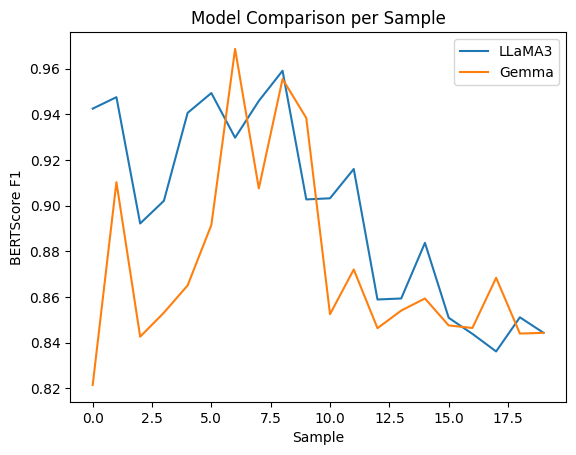

In [13]:
import matplotlib.pyplot as plt

plt.plot(df["LLaMA3_bertscore_f1"], label="LLaMA3")
plt.plot(df["Gemma_bertscore_f1"], label="Gemma")
plt.xlabel("Sample")
plt.ylabel("BERTScore F1")
plt.legend()
plt.title("Model Comparison per Sample")
plt.show()